In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency 
from sklearn.model_selection import train_test_split

* Business goal : This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

In [2]:
df=pd.read_csv(r'C:\Users\User\Desktop\DATA SCIENCE\Kaggle Projects\Fish Market\Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.shape

(159, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Statistical description 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


## Data cleaning 

In [6]:
#Finding zero value
df[(df['Weight']==0)]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


* Since weight is usually affected by length, we'll replace the zero value with the closest Roach's length. 

In [7]:
#Filtering data
df[(df['Species'] == 'Roach') & (df['Length1'] <= 20)]

,Species,Weight,Length1,Length2,Length3,Height,Width
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943


In [8]:
#Replacing the zero value
df.iloc[[40]]=df.iloc[[40]].replace({0.0:110.00})

In [9]:
df.iloc[[40]]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,110.0,19.0,20.5,22.8,6.4752,3.3516


In [10]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

* There are no null values in data

In [11]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

## Pairplot 

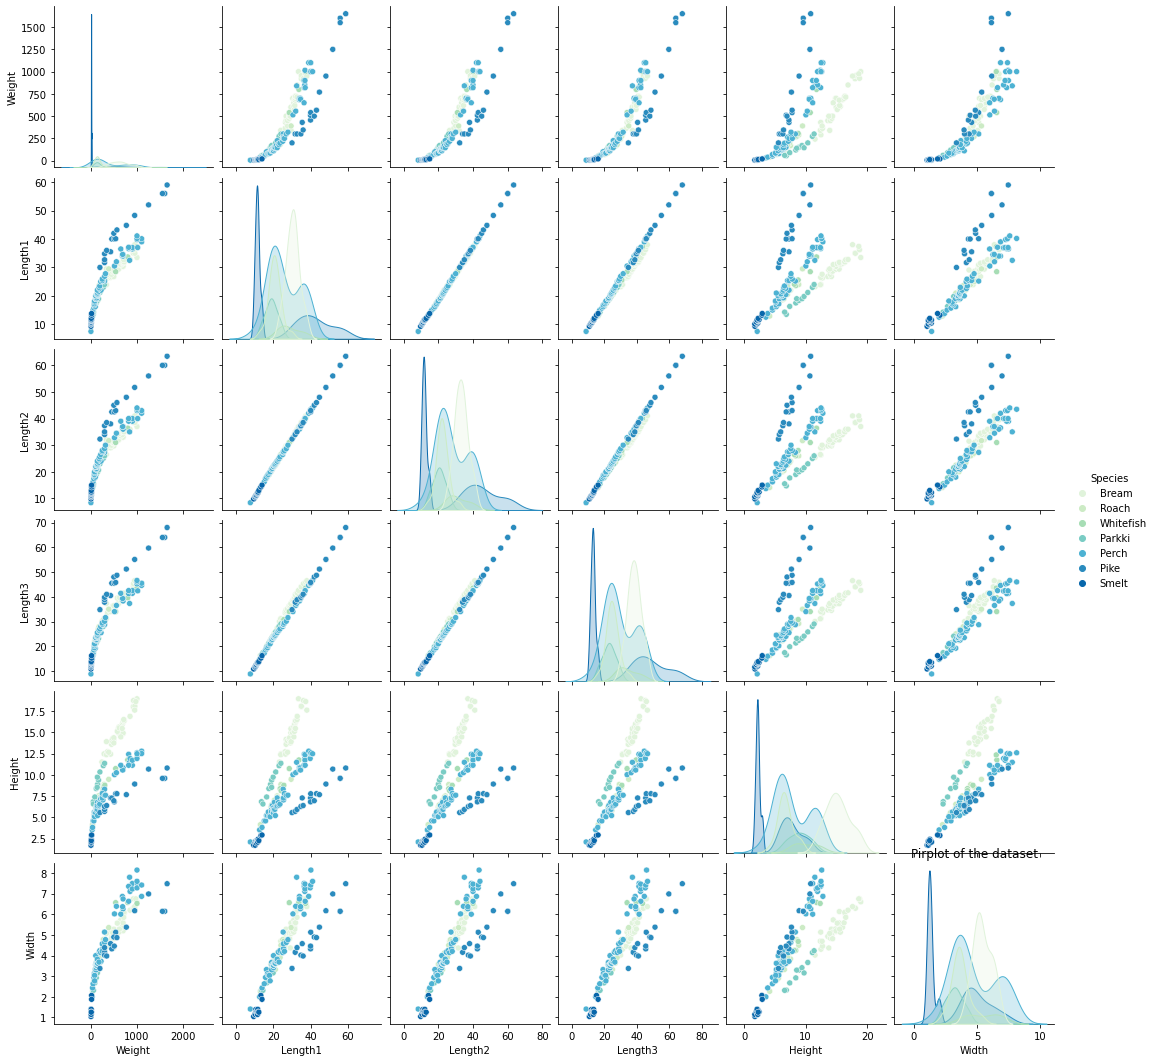

In [12]:
sns.pairplot(df, hue = 'Species', palette = 'GnBu')
plt.title('Pirplot of the dataset')
plt.show()

## Data exploration 

In [13]:
df.groupby('Species').mean().round(2)

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.83,30.31,33.11,38.35,15.18,5.43
Parkki,154.82,18.73,20.35,22.79,8.96,3.22
Perch,382.24,25.74,27.89,29.57,7.86,4.75
Pike,718.71,42.48,45.48,48.72,7.71,5.09
Roach,157.55,20.65,22.28,24.97,6.69,3.66
Smelt,11.18,11.26,11.92,13.04,2.21,1.34
Whitefish,531.00,28.80,31.32,34.32,10.03,5.47


* From the table above we can see that, from the average weight of all species Pike and Bream is commonly heavy arround 718gram and 617gram respectively and on the opposite Smelt is commonly light with weight arround 11gram

## Boxplot to visualise outliers   

In [14]:
cont_features=[feature for feature in df.columns if ((df[feature].dtypes!='O') & (feature not in ['Weight']))]
cont_features

['Length1', 'Length2', 'Length3', 'Height', 'Width']

Length1


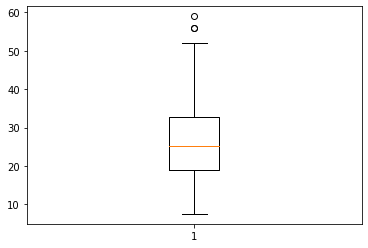

Length2


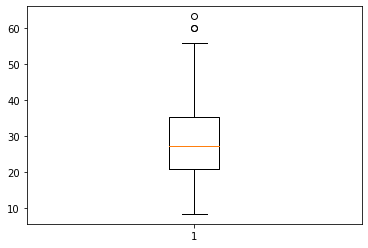

Length3


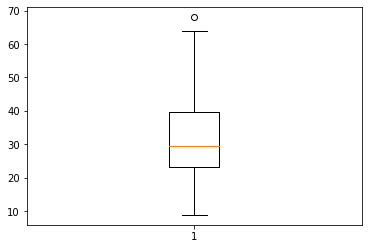

Height


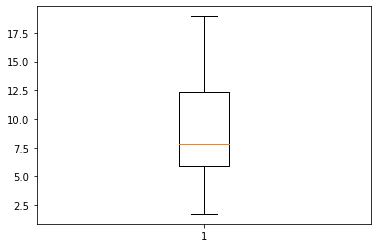

Width


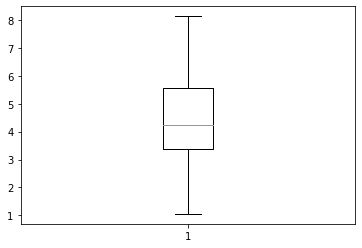

In [15]:
for i in cont_features:
    plt.boxplot(df[i])
    print(i)
    plt.show()

## Data Visualization 

#### Species and Weight

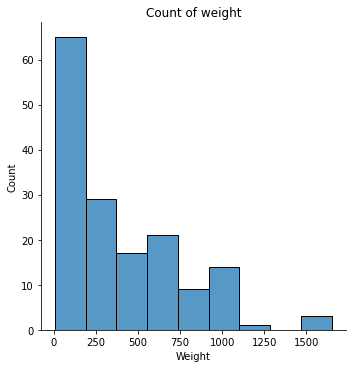

In [16]:
sns.displot(df.Weight)
plt.title('Count of weight')
plt.show()

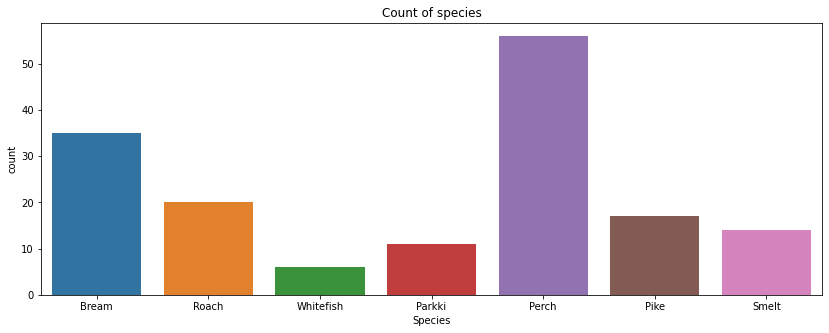

In [17]:
plt.figure(figsize=(14,5))
sns.countplot(df.Species)
plt.title('Count of species')
plt.show()

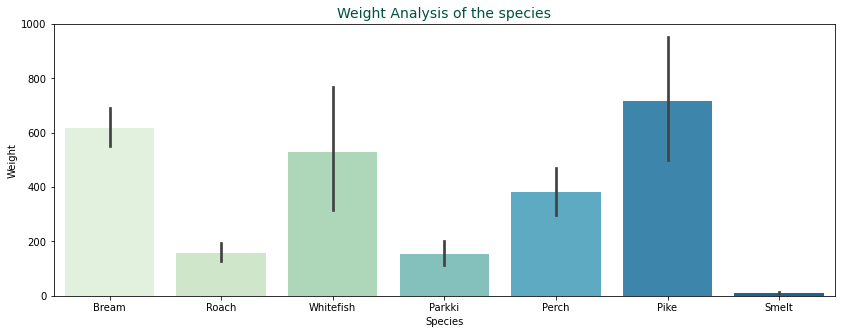

In [18]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'Species', y = 'Weight', data = df, palette = 'GnBu')
plt.title('Weight Analysis of the species', size = 14, color = '#005142')
plt.show()

* The top 3 species with a heavier average weight are Pike, Bream, and Whitefish

#### Species and Length1  

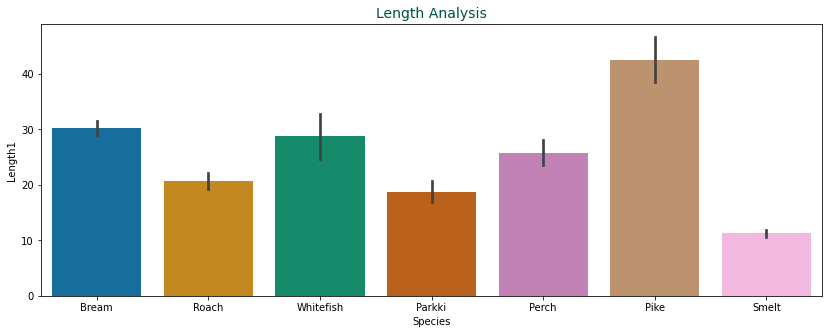

In [19]:
plt.figure(figsize=(14,5))
sns.barplot(x='Species',y='Length1',data=df,palette='colorblind')
plt.title('Length Analysis',size=14,color='#005142')
plt.show()

* From the average length of all the fish, we can see that again Pike, Bream, and Whitefish is in the top 3. Which means they are relatively long.

#### Species and Width 

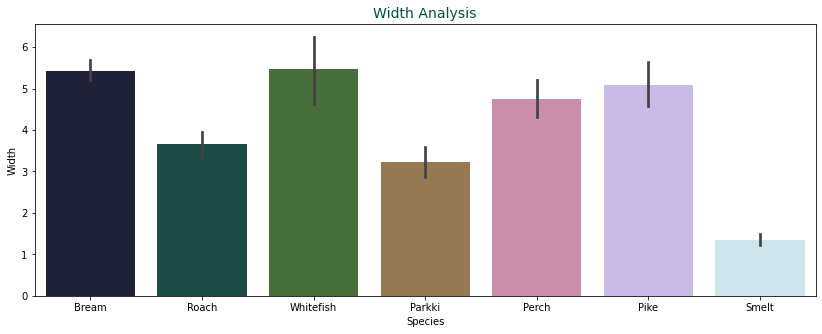

In [20]:
plt.figure(figsize=(14,5))
sns.barplot(x='Species',y='Width',data=df,palette="cubehelix")
plt.title('Width Analysis',size=14,color='#005142')
plt.show()

* From the average width of all the fish, we can see that Whitefish and Bream is relatively wide.

#### Species and Length2

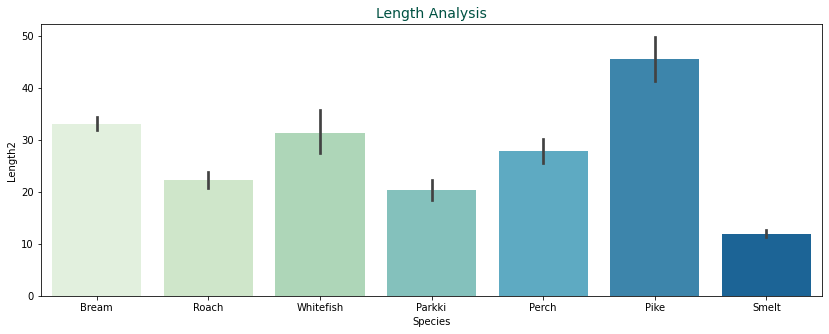

In [21]:
plt.figure(figsize=(14,5))
sns.barplot(x='Species',y='Length2',data=df,palette="GnBu")
plt.title('Length Analysis',size=14,color='#005142')
plt.show()

#### Species and Length3

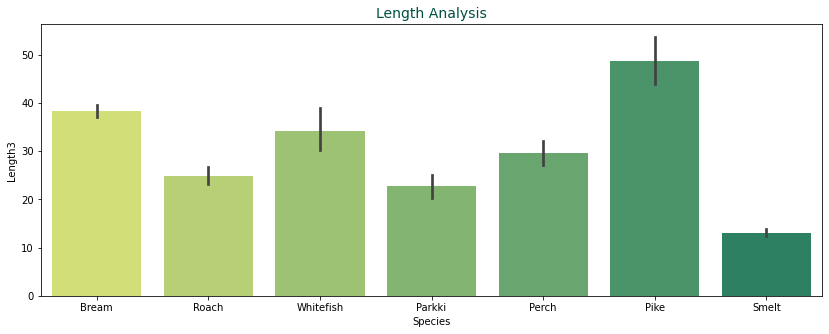

In [22]:
plt.figure(figsize=(14,5))
sns.barplot(x='Species',y='Length3',data=df,palette="summer_r")
plt.title('Length Analysis',size=14,color='#005142')
plt.show()

## Model Building

#### OLS METHOD 

In [23]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [24]:
#Label encoding
df.Species.replace(to_replace=['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish'],value=[1,2,3,4,5,6,7],inplace=True)

In [25]:
df['Species']=df['Species'].astype(int)

In [31]:
df['Species'].value_counts()

1    56
2    35
3    20
4    17
5    14
6    11
7     6
Name: Species, dtype: int64

In [26]:
#Splitting the data
df_train = df.iloc[0:100,]
df_test = df.iloc[100:,]

In [27]:
df_train.shape

(100, 7)

In [28]:
df_test.shape

(59, 7)

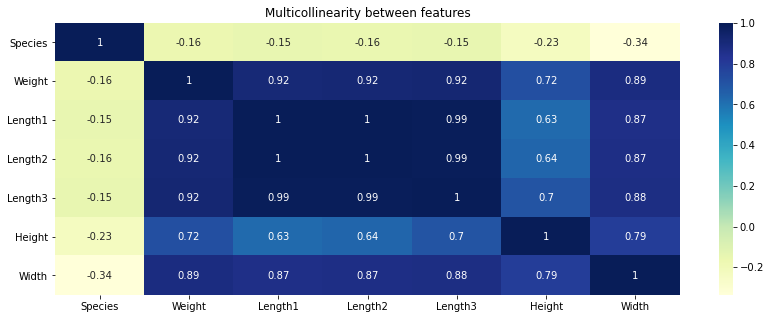

In [43]:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.title('Multicollinearity between features')
plt.show()

In [50]:
model1= smf.ols(formula='Species~Weight+Length1+Length2+Length3+Height+Width',data=df_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Species   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     4.752
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           0.000289
Time:                        16:16:15   Log-Likelihood:                -188.29
No. Observations:                 100   AIC:                             390.6
Df Residuals:                      93   BIC:                             408.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2641      1.502      2.173      0.0

In [68]:
model2 = smf.ols(formula='Weight~Length1+Height',data=df_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     592.0
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           4.38e-55
Time:                        16:31:30   Log-Likelihood:                -574.76
No. Observations:                 100   AIC:                             1156.
Df Residuals:                      97   BIC:                             1163.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -524.2333     36.930    -14.195      0.0

### SGD METHOD 

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [53]:
X=df.drop(['Weight'],axis=1)
y=df['Weight']

In [55]:
X.shape

(159, 6)

In [56]:
y.shape

(159,)

In [57]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
#Standardizing the data
sc_x = StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [60]:
X_train.shape

(111, 6)

In [61]:
y_train.shape

(111,)

In [62]:
X_test.shape

(48, 6)

In [63]:
y_test.shape

(48,)

In [64]:
model=SGDRegressor()

In [65]:
model.fit(X_train,y_train)

SGDRegressor()

In [66]:
score=model.score(X_train,y_train)
print('R Squared:',score)

R Squared: 0.8862084108829762


## RMSE 

In [69]:
#PREDICTION
y_pred=model.predict(X_test)

In [70]:
mse=mean_squared_error(y_test,y_pred)
print('RMSE:',np.sqrt(mse))

RMSE: 127.23340451978616
